## Introduction

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Required to import, and briefly discuss, the libraries that will be used throughout analysis and modelling. |

In [121]:
import nltk
from nltk import FreqDist, bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Libraries for data loading, data manipulation and data visulisation
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns  # For enhanced data visualization
import re
import nltk
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical


from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42 ###



In [122]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zukhanyegcilitshana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zukhanyegcilitshana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zukhanyegcilitshana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| Load the data from the `train and test` file into a DataFrame. |

---

In [123]:
# loaded the data from the df file as a dataFrame
df_train = pd.read_csv("train_set.csv") 
df_test = pd.read_csv("test_set.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| Perform an in-depth analysis of all the variables in the DataFrame. |

---

In [124]:
df_train

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [125]:
df_test

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
...,...,...
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."


In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


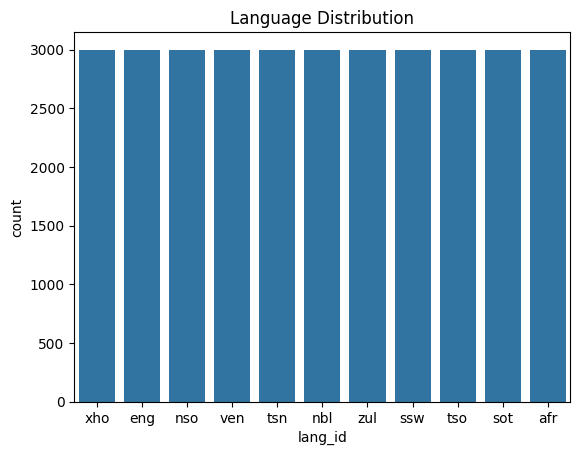

In [127]:
#distribution of languages
sns.countplot(x = 'lang_id', data = df_train)
plt.title('Language Distribution')
plt.show()


Text(0.5, 1.0, 'WordCloud for language text')

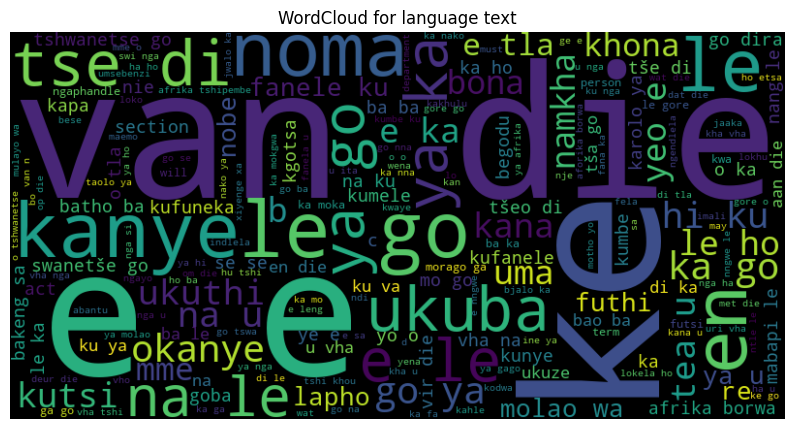

In [128]:
#wordcloud to see which words appear more frequently
language_word = df_train['text'].values
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(language_word))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for language text')

In [129]:
# Assuming df_train is your DataFrame with the 'text' column
tokenized_texts = df_train['text'].apply(lambda x: word_tokenize(x))
flattened_tokens = [word for sublist in tokenized_texts for word in sublist]
total_words = len(flattened_tokens)

print(f"Total number of words: {total_words}")


Total number of words: 1225313


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| Clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [130]:
def clean_text(text):
    text = re.sub("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})", "", text)  # Removing all punctuation with no space
    text = re.sub("(<br\s/><br\s/?)|(-)|(_)|(/)|(:).", " ", text)  # Removing all punctuation with a space
    text = re.sub("\\s+", " ", text)  # Remove extra whitespace
    text = text.lower()
    
    return text
    
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [131]:
df_train

,lang_id,text
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [132]:
df_test

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta
...,...,...
5677,5678,you mark your ballot in private
5678,5679,ge o ka kgetha ka bowena go se šomiše mofani k...
5679,5680,e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680,5681,tb ke bokudi ba pmb mme morero o tla lefella t...


In [133]:
# removing punctuations on our training dataset
df_train['text'] = df_train['text'].apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))

# removing punctuations on our testing dataset
df_test['text'] = df_test['text'].apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))

In [134]:
#tokenize the text
df_train['tokenized'] = df_train['text'].apply(word_tokenize)
df_test['tokenized'] = df_test['text'].apply(word_tokenize)

In [135]:
df_train

,lang_id,text,tokenized
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi..."
1,xho,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb..."
2,eng,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,"[popo, ya, dipolateforomo, tse, ke, go, tlisa,..."
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,"[modise, mosadi, na, o, ntse, o, sa, utlwe, ho..."
32997,eng,closing date for the submission of completed t...,"[closing, date, for, the, submission, of, comp..."
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,"[nawuphina, umntu, ofunyenwe, enetyala, phants..."


In [136]:
df_test

,index,text,tokenized
0,1,mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,winste op buitelandse valuta,"[winste, op, buitelandse, valuta]"
...,...,...,...
5677,5678,you mark your ballot in private,"[you, mark, your, ballot, in, private]"
5678,5679,ge o ka kgetha ka bowena go se šomiše mofani k...,"[ge, o, ka, kgetha, ka, bowena, go, se, šomiše..."
5679,5680,e ka kopo etsa kgetho ya hao ka hloko hobane h...,"[e, ka, kopo, etsa, kgetho, ya, hao, ka, hloko..."
5680,5681,tb ke bokudi ba pmb mme morero o tla lefella t...,"[tb, ke, bokudi, ba, pmb, mme, morero, o, tla,..."


In [137]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [138]:
#lemmatizing the tokenized words


df_train['lemmatized'] = df_train['tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_test['lemmatized'] = df_test['tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# joining the tokenised words after they have been lemmatized
df_train['lemmatized'] = [' '.join(map(str, l)) for l in df_train['lemmatized']]
df_test['lemmatized'] = [' '.join(map(str, l)) for l in df_test['lemmatized']]

In [139]:
df_train

,lang_id,text,tokenized,lemmatized
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...",o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,"[popo, ya, dipolateforomo, tse, ke, go, tlisa,...",popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,"[modise, mosadi, na, o, ntse, o, sa, utlwe, ho...",modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...,"[closing, date, for, the, submission, of, comp...",closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,"[nawuphina, umntu, ofunyenwe, enetyala, phants...",nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [140]:
#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()
#df_train['categorical_column'] = label_encoder.fit_transform(df_train['lemmatized'])


In [141]:
df_train

,lang_id,text,tokenized,lemmatized
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...",o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,"[popo, ya, dipolateforomo, tse, ke, go, tlisa,...",popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,"[modise, mosadi, na, o, ntse, o, sa, utlwe, ho...",modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...,"[closing, date, for, the, submission, of, comp...",closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,"[nawuphina, umntu, ofunyenwe, enetyala, phants...",nawuphina umntu ofunyenwe enetyala phantsi kwa...


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| Create one or more classification models that are able to accurately predict |

---

In [142]:
# Split the data into training and testing sets
X = df_train['lemmatized']
y = df_train['lang_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [143]:
tfidf_vectorizer = TfidfVectorizer(max_features=50000)  #converting text to numerical for the model
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [144]:
# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

# Logistic Regression

Naive Bayes Accuracy: 0.998030303030303
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.99      1.00      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [145]:
# Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.9953030303030304
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      1.00      0.99       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      0.99       609
         zul       0.99      0.98      0.98       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))


SVM Accuracy: 0.9957575757575757
SVM Classification Report:
               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      0.99      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.98      0.99      0.98       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [147]:
# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.9840909090909091
Random Forest Classification Report:
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.98      0.95      0.96       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.97      0.96      0.97       584
         tsn       0.99      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.97      0.96      0.97       609
         zul       0.92      0.96      0.94       590

    accuracy                           0.98      6600
   macro avg       0.98      0.98      0.98      6600
weighted avg       0.98      0.98      0.98      6600



<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| Compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
""" My best performing model was the random forrest with a score of 0.98
The other models gave me a perfect score of 1 which is not realistic in the real world
"""

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---